In [1]:
import zarr
import xarray as xr
from pyproj import CRS, Transformer


# group dir
tmp_zarr_group_dir  = "/playpen-ssd/levi/ccrfcd-gauge-grids/data/hrrr-env/20210123_23z_anl/0_500m_above_ground/CANGLE"

# var dir
tmp_zarr_dir        = "/playpen-ssd/levi/ccrfcd-gauge-grids/data/hrrr-env/20210123_23z_anl/0_500m_above_ground/CANGLE/0_500m_above_ground/CANGLE"

g = zarr.open(tmp_zarr_dir)

# proj y, proj x
g[:].shape

(1059, 1799)

In [2]:
import s3fs
import xarray as xr


# for projecting zarr -> lat/lon
url = "s3://hrrrzarr/sfc/20210601/20210601_00z_anl.zarr"
fs = s3fs.S3FileSystem(anon=True)
chunk_index = xr.open_zarr(s3fs.S3Map("s3://hrrrzarr/grid/HRRR_chunk_index.zarr", s3=fs))
chunk_index

<xarray.Dataset> Size: 46MB
Dimensions:     (x: 1799, y: 1059)
Coordinates:
  * x           (x) float64 14kB -2.698e+06 -2.695e+06 ... 2.693e+06 2.696e+06
  * y           (y) float64 8kB -1.587e+06 -1.584e+06 ... 1.584e+06 1.587e+06
Data variables:
    chunk_id    (x, y) object 15MB dask.array<chunksize=(1799, 1059), meta=np.ndarray>
    chunk_x     (x) int32 7kB dask.array<chunksize=(1799,), meta=np.ndarray>
    chunk_y     (y) int32 4kB dask.array<chunksize=(1059,), meta=np.ndarray>
    in_chunk_x  (x) int32 7kB dask.array<chunksize=(1799,), meta=np.ndarray>
    in_chunk_y  (y) int32 4kB dask.array<chunksize=(1059,), meta=np.ndarray>
    index_x     (x) int32 7kB dask.array<chunksize=(1799,), meta=np.ndarray>
    index_y     (y) int32 4kB dask.array<chunksize=(1059,), meta=np.ndarray>
    latitude    (y, x) float64 15MB dask.array<chunksize=(133, 450), meta=np.ndarray>
    longitude   (y, x) float64 15MB dask.array<chunksize=(133, 450), meta=np.ndarray>

In [3]:
chunk_index.longitude.shape

(1059, 1799)

In [1]:
import pandas as pd


df1 = pd.read_csv("/playpen-ssd/levi/ccrfcd-gauge-grids/data/2021-01-01_2025-07-25_gt_p1.csv")
df2 = pd.read_csv("/playpen-ssd/levi/ccrfcd-gauge-grids/data/2021-01-01_2025-07-25_gt_p2.csv")
df  = pd.concat([df1, df2], axis=0).drop("Unnamed: 0", axis=1)
df.head()

,gauge_idx,start_datetime_utc,end_datetime_utc,gauge_acc_in,mrms_q3evap_qpe,lat,lon
0,4564.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.000000,36.028250,-115.003639
1,4779.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.000000,36.021861,-114.958750
2,4709.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.003937,35.925000,-115.117000
3,4724.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.015748,35.939417,-115.077750
4,4564.0,2021-01-23 23:02:00+00:00,2021-01-24 00:02:00+00:00,0.0,0.000000,36.028250,-115.003639


In [ ]:
import json

with open("/playpen-ssd/levi/ccrfcd-gauge-grids/scripts/hrrr_env_rows.json", "r") as f:
    data = json.load(f)

In [3]:
import pandas as pd 


df = pd.read_csv("data/2021-01-01_2025-07-25_hrrr_env.csv").drop("Unnamed: 0", axis=1)
df.head()

,gauge_idx,start_datetime_utc,end_datetime_utc,gauge_acc_in,mrms_q3evap_qpe,lat,lon,700mb_UGRD,850mb_DPT,850mb_TMP,...,700mb_TMP,500mb_DPT,700mb_HGT,850mb_UGRD,700mb_VGRD,highest_tropospheric_freezing_level_HGT,surface_PRES,level_of_adiabatic_condensation_from_sfc_HGT,850mb_VGRD,2m_above_ground_DPT
0,4564.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.000000,36.028250,-115.003639,3.759766,268.25,276.75,...,263.25,243.250,2966.0,-0.227539,5.605469,1810.0,93460.0,1895.0,0.92334,269.75
1,4779.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.000000,36.021861,-114.958750,3.884766,268.50,276.75,...,263.25,243.125,2966.0,-0.165039,5.605469,1820.0,93940.0,1943.0,0.92334,269.75
2,4709.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.003937,35.925000,-115.117000,2.822266,265.75,277.25,...,263.25,242.875,2966.0,-0.165039,5.292969,1830.0,91100.0,1908.0,0.86084,267.50
3,4724.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.015748,35.939417,-115.077750,2.884766,266.00,277.25,...,263.25,243.125,2966.0,-0.227539,5.230469,1840.0,89950.0,1838.0,0.73584,267.25
4,4564.0,2021-01-23 23:02:00+00:00,2021-01-24 00:02:00+00:00,0.0,0.000000,36.028250,-115.003639,3.759766,268.25,276.75,...,263.25,243.250,2966.0,-0.227539,5.605469,1810.0,93460.0,1895.0,0.92334,269.75


In [2]:
import metpy
import metpy.calc as mpcalc

import numpy as np
from metpy.calc import equivalent_potential_temperature, mixing_ratio
from metpy.units import units


# surface theta e (equivalent potential temperature)
# * https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.equivalent_potential_temperature.html

# f(pres., temp., dewpoint) -> theta e
# * https://mesowest.utah.edu/html/hrrr/zarr_documentation/html/zarr_variables.html
surface_pressure = np.array(df["surface_PRES"])        * units.Pa
surface_temp     = np.array(df["2m_above_ground_TMP"]) * units.K
surface_dewpoint = np.array(df["2m_above_ground_DPT"]) * units.K

df["surface_theta_e"] = equivalent_potential_temperature(surface_pressure, surface_temp, surface_dewpoint)

/playpen-ssd/levi/miniconda3/envs/wfc/lib/python3.14/site-packages/metpy/calc/thermo.py:1633: RuntimeWarning: invalid value encountered in power
  * (mpconsts.nounit.T0 / temperature) ** heat_power
/tmp/ipykernel_266277/392762845.py:18: UserWarning: Saturation mixing ratio is undefined for some requested pressure/temperature combinations. Total pressure must be greater than the water vapor saturation pressure for liquid water to be in equilibrium.
  df["surface_theta_e"] = equivalent_potential_temperature(surface_pressure, surface_temp, surface_dewpoint)
/playpen-ssd/levi/miniconda3/envs/wfc/lib/python3.14/site-packages/metpy/calc/thermo.py:1943: RuntimeWarning: invalid value encountered in log
  t_l = 56 + 1. / (1. / (td - 56) + np.log(t / td) / 800.)
/playpen-ssd/levi/miniconda3/envs/wfc/lib/python3.14/site-packages/pint/facets/plain/quantity.py:1296: RuntimeWarning: invalid value encountered in power
  magnitude = new_self._magnitude**exponent


In [3]:
df[:1].columns

Index(['gauge_idx', 'start_datetime_utc', 'end_datetime_utc', 'gauge_acc_in',
       'mrms_q3evap_qpe', 'lat', 'lon', '700mb_UGRD', '850mb_DPT', '850mb_TMP',
       '850mb_HGT', '2m_above_ground_TMP', '925mb_DPT',
       'entire_atmosphere_single_layer_PWAT', '500mb_TMP', '700mb_DPT',
       '700mb_TMP', '500mb_DPT', '700mb_HGT', '850mb_UGRD', '700mb_VGRD',
       'highest_tropospheric_freezing_level_HGT', 'surface_PRES',
       'level_of_adiabatic_condensation_from_sfc_HGT', '850mb_VGRD',
       '2m_above_ground_DPT', 'surface_theta_e'],
      dtype='object')

**Lowest 100mb mean mixing ratio**

$$
\text{mixing ratio: }r = \epsilon \frac{e}{p - e}
$$
- knowns
    - $\epsilon \approx 0.6219569100577033$
    - $p$: station pressure 
- unknowns
    - $e$: vapor pressure
        - $\text{vapor pressure: } e = p \frac{r}{r + \epsilon}$


- Vapor Pressure (via https://www.weather.gov/media/epz/wxcalc/vaporPressure.pdf)
$$
e = 6.11 * 10^{\frac{7.5 * T_d}{237.3 + T_d}}
$$

***

$$

\bar{w} = \frac{1}{100} \int_{P_s - 100}^{P_s} wdp

$$

$$

\frac{1}{100} [ p * w  ]|_{P_s - 100}^{P_s}

$$

In [4]:
import numpy as np
import pandas as pd


def add_lowest_100mb_mean_mixing_ratio(df):
    """
    Adds a column 'lowest_100mb_mean_mixing_ratio' to the dataframe.
    Calculates the mean mixing ratio of the surface and any isobaric levels
    within 100mb of the surface.
    """
    
    # --- 1. Define Helper to Calculate Mixing Ratio (g/kg) ---
    def get_mixing_ratio(pressure_hpa, dewpoint_k):
        # Convert Kelvin to Celsius
        dpt_c = dewpoint_k - 273.15
        
        # Calculate Vapor Pressure (Alduchov and Eskridge approximation) in hPa
        # e = 6.112 * exp((17.67 * Td) / (Td + 243.5))
        e = 6.112 * np.exp((17.67 * dpt_c) / (dpt_c + 243.5))
        
        # Calculate Mixing Ratio: w = 0.622 * e / (P - e)
        # Result multiplied by 1000 to get g/kg
        w = 1000 * (0.622 * e) / (pressure_hpa - e)
        return w

    # --- 2. Prepare Data (Surface Pressure in hPa) ---
    p_sfc = df['surface_PRES'].values / 100.0  # Convert Pa to hPa
    
    # --- 3. Calculate Mixing Ratios for all relevant levels ---
    # Surface
    w_sfc = get_mixing_ratio(p_sfc, df['2m_above_ground_DPT'].values)
    # Fixed Levels
    w_925 = get_mixing_ratio(925.0, df['925mb_DPT'].values)
    w_850 = get_mixing_ratio(850.0, df['850mb_DPT'].values)
    w_700 = get_mixing_ratio(700.0, df['700mb_DPT'].values)
    
    # --- 4. Logic to Average Levels within Lowest 100mb ---
    # Initialize accumulators for the mean calculation
    w_sum = w_sfc.copy()
    count = np.ones_like(p_sfc) # Start with count=1 (Surface is always included)

    # Define the cutoff pressure (Surface - 100mb)
    p_limit = p_sfc - 100.0

    # Check 925mb: Include if it is below Surface and above the limit
    mask_925 = (925.0 < p_sfc) & (925.0 >= p_limit)
    w_sum += np.where(mask_925, w_925, 0.0)
    count += np.where(mask_925, 1, 0)

    # Check 850mb
    mask_850 = (850.0 < p_sfc) & (850.0 >= p_limit)
    w_sum += np.where(mask_850, w_850, 0.0)
    count += np.where(mask_850, 1, 0)

    # Check 700mb (Rare, but possible for high elevation/low pressure events)
    mask_700 = (700.0 < p_sfc) & (700.0 >= p_limit)
    w_sum += np.where(mask_700, w_700, 0.0)
    count += np.where(mask_700, 1, 0)

    # --- 5. Assign Result ---
    df['lowest_100mb_mean_mixing_ratio'] = w_sum / count
    
    return df

# Example Usage:
df = add_lowest_100mb_mean_mixing_ratio(df)

In [5]:
df.columns

Index(['gauge_idx', 'start_datetime_utc', 'end_datetime_utc', 'gauge_acc_in',
       'mrms_q3evap_qpe', 'lat', 'lon', '700mb_UGRD', '850mb_DPT', '850mb_TMP',
       '850mb_HGT', '2m_above_ground_TMP', '925mb_DPT',
       'entire_atmosphere_single_layer_PWAT', '500mb_TMP', '700mb_DPT',
       '700mb_TMP', '500mb_DPT', '700mb_HGT', '850mb_UGRD', '700mb_VGRD',
       'highest_tropospheric_freezing_level_HGT', 'surface_PRES',
       'level_of_adiabatic_condensation_from_sfc_HGT', '850mb_VGRD',
       '2m_above_ground_DPT', 'surface_theta_e',
       'lowest_100mb_mean_mixing_ratio'],
      dtype='object')

In [6]:
df["lowest_100mb_mean_mixing_ratio"]

0          2.940182
1          2.925115
2          2.087183
3          2.003038
4          2.940182
             ...   
1557501    5.802657
1557502    5.802657
1557503    5.802657
1557504    5.802657
1557505    5.802657
Name: lowest_100mb_mean_mixing_ratio, Length: 1557506, dtype: float64

In [ ]:
# 925-750mb dp

# 850-700mb dp

# 850-500mb dp

import pandas as pd
import io

# Define the source columns for readability
dpt_925 = df['925mb_DPT']
dpt_850 = df['850mb_DPT']
dpt_700 = df['700mb_DPT']
dpt_500 = df['500mb_DPT']

# 1. 925-700mb Mean Dewpoint (Pressure Weighted)
# Weights derived from trapezoidal rule over 75mb and 150mb intervals
# Coeffs: 925mb (1/6), 850mb (3/6), 700mb (2/6)
df['925mb_700mb_DPT'] = (
    (1/6) * dpt_925 + 
    (3/6) * dpt_850 + 
    (2/6) * dpt_700
)

# 2. 850-700mb Mean Dewpoint
# Simple average as there are no intermediate levels provided in valid range
df['850mb_700mb_DPT'] = (dpt_850 + dpt_700) / 2

# 3. 850-500mb Mean Dewpoint (Pressure Weighted)
# Weights derived from trapezoidal rule over 150mb and 200mb intervals
# Coeffs: 850mb (3/14), 700mb (7/14 or 0.5), 500mb (4/14 or 2/7)
df['850mb_500mb_DPT'] = (
    (3/14) * dpt_850 + 
    (1/2)  * dpt_700 + 
    (2/7)  * dpt_500
)

# ---------------------------------------------------------
# VIEW RESULTS
# ---------------------------------------------------------
desired_cols = [
    '925mb_DPT', '850mb_DPT', '700mb_DPT', '500mb_DPT', 
    '925mb_700mb_DPT', '850mb_700mb_DPT', '850mb_500mb_DPT'
]
df

,gauge_idx,start_datetime_utc,end_datetime_utc,gauge_acc_in,mrms_q3evap_qpe,lat,lon,700mb_UGRD,850mb_DPT,850mb_TMP,...,highest_tropospheric_freezing_level_HGT,surface_PRES,level_of_adiabatic_condensation_from_sfc_HGT,850mb_VGRD,2m_above_ground_DPT,surface_theta_e,lowest_100mb_mean_mixing_ratio,925mb_700mb_DPT,850mb_700mb_DPT,850mb_500mb_DPT
0,4564.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.000000,36.028250,-115.003639,3.759766,268.250000,276.750000,...,1810.0,93460.0,1895.000000,0.92334,269.750000,292.374290,2.940182,266.416667,265.125000,257.982143
1,4779.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.000000,36.021861,-114.958750,3.884766,268.500000,276.750000,...,1820.0,93940.0,1943.000000,0.92334,269.750000,292.451426,2.925115,266.250000,264.875000,257.625000
2,4709.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.003937,35.925000,-115.117000,2.822266,265.750000,277.250000,...,1830.0,91100.0,1908.000000,0.86084,267.500000,292.511860,2.087183,264.583333,263.375000,256.839286
3,4724.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.015748,35.939417,-115.077750,2.884766,266.000000,277.250000,...,1840.0,89950.0,1838.000000,0.73584,267.250000,292.531057,2.003038,264.875000,263.750000,257.214286
4,4564.0,2021-01-23 23:02:00+00:00,2021-01-24 00:02:00+00:00,0.0,0.000000,36.028250,-115.003639,3.759766,268.250000,276.750000,...,1810.0,93460.0,1895.000000,0.92334,269.750000,292.374290,2.940182,266.416667,265.125000,257.982143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557501,3229.0,2025-07-20 03:40:00+00:00,2025-07-20 04:40:00+00:00,0.0,0.007874,36.802333,-114.953472,2.692192,278.963867,300.408142,...,4670.0,92180.0,3401.800781,-6.97234,280.112732,317.470937,5.802657,276.274292,274.638077,270.076911
1557502,3229.0,2025-07-20 03:42:00+00:00,2025-07-20 04:42:00+00:00,0.0,0.007874,36.802333,-114.953472,2.692192,278.963867,300.408142,...,4670.0,92180.0,3401.800781,-6.97234,280.112732,317.470937,5.802657,276.274292,274.638077,270.076911
1557503,3229.0,2025-07-20 03:44:00+00:00,2025-07-20 04:44:00+00:00,0.0,0.003937,36.802333,-114.953472,2.692192,278.963867,300.408142,...,4670.0,92180.0,3401.800781,-6.97234,280.112732,317.470937,5.802657,276.274292,274.638077,270.076911
1557504,3229.0,2025-07-20 03:46:00+00:00,2025-07-20 04:46:00+00:00,0.0,0.003937,36.802333,-114.953472,2.692192,278.963867,300.408142,...,4670.0,92180.0,3401.800781,-6.97234,280.112732,317.470937,5.802657,276.274292,274.638077,270.076911


In [3]:
import pandas as pd

df = pd.read_csv("data/2021-01-01_2025-07-25_hrrr_env_final_v1.csv").drop("Unnamed: 0", axis=1)

In [4]:
df.columns

Index(['gauge_idx', 'start_datetime_utc', 'end_datetime_utc', 'gauge_acc_in',
       'mrms_q3evap_qpe', 'lat', 'lon', '700mb_UGRD', '850mb_DPT', '850mb_TMP',
       '850mb_HGT', '2m_above_ground_TMP', '925mb_DPT',
       'entire_atmosphere_single_layer_PWAT', '500mb_TMP', '700mb_DPT',
       '700mb_TMP', '500mb_DPT', '700mb_HGT', '850mb_UGRD', '700mb_VGRD',
       'highest_tropospheric_freezing_level_HGT', 'surface_PRES',
       'level_of_adiabatic_condensation_from_sfc_HGT', '850mb_VGRD',
       '2m_above_ground_DPT', 'surface_theta_e',
       'lowest_100mb_mean_mixing_ratio', '925mb_700mb_DPT', '850mb_700mb_DPT',
       '850mb_500mb_DPT', 'LCL_LFC_RH', '0-3km_RH', '0-5km_RH', 'DCAPE',
       'low_level_lapse_rate', '3hr_lapse_rate_change', 'sfc_850_pw',
       'sfc_700_pw', '850_700_mean_wind', 'CWCD'],
      dtype='object')

In [ ]:
import sounderpy as spy

# 2021-01-24 00:00:00+00:00
clean_data = spy.get_model_data('rap-ruc', [36.028250, -115.003639], '2015', '01', '24', '0')
spy.build_sounding(clean_data)

In [2]:
df[:1]

NameError: name 'df' is not defined

In [ ]:
from metpy.units import units
from metpy.calc import specific_humidity_from_dewpoint, relative_humidity_from_specific_humidity

# LCL-LFC RH
# ---

# https://www.theweatherprediction.com/habyhints3/950/
# * LCL: lifting condensation level
# * LFC: level of free convection
    # "bottom of where CAPE and instability begin"
# * LCL-LFC RH
    # relative humidity between the LCL and LFC levels

# hPa
P_surface  = df["surface_PRES"][0] * units.hPa
P_850       = 85000.0 * units.hPa
P_700       = 70000.0 * units.hPa
P_500       = 50000.0 * units.hPa

# K
T_surface  = df["2m_above_ground_TMP"][0] * units.K
T_850      = df["850mb_TMP"][0]           * units.K
T_700      = df["700mb_TMP"][0]           * units.K
T_500      = df["500mb_TMP"][0]           * units.K

# want relative humidity
dp_surface = df["2m_above_ground_DPT"][0] * units.K
dp_850     = df["850mb_DPT"][0]           * units.K
dp_700     = df["700mb_DPT"][0]           * units.K
dp_500     = df["500mb_DPT"][0]           * units.K

sh_surface = specific_humidity_from_dewpoint(P_surface, dp_surface)
sh_850     = specific_humidity_from_dewpoint(P_850, dp_850)
sh_700     = specific_humidity_from_dewpoint(P_700, dp_700)
sh_500     = specific_humidity_from_dewpoint(P_500, dp_500)

rh_surface = relative_humidity_from_specific_humidity(P_surface, T_surface, sh_surface)
rh_850     = relative_humidity_from_specific_humidity(P_850, T_850, sh_850)
rh_700     = relative_humidity_from_specific_humidity(P_700, T_700, sh_700)
rh_500     = relative_humidity_from_specific_humidity(P_500, T_500, sh_500)

(<Quantity(0.337154883, 'dimensionless')>,
 <Quantity(0.537498325, 'dimensionless')>,
 <Quantity(0.905578828, 'dimensionless')>,
 <Quantity(0.698711065, 'dimensionless')>)

In [ ]:
# Vibe coded

import numpy as np
import pandas as pd


def saturation_vapor_pressure(T_K):
    """
    Compute saturation vapor pressure using Tetens formula.
    Fully vectorized for speed.
    
    Parameters:
        T_K: Temperature in Kelvin (scalar or array)
    
    Returns:
        Saturation vapor pressure in Pa
    """
    T_C = T_K - 273.15
    return 610.78 * np.exp(17.27 * T_C / (T_C + 237.3))


def relative_humidity(T_K, Td_K):
    """
    Compute relative humidity from temperature and dewpoint.
    Fully vectorized.
    
    Parameters:
        T_K: Temperature in Kelvin
        Td_K: Dewpoint temperature in Kelvin
    
    Returns:
        Relative humidity as fraction (0-1)
    """
    e = saturation_vapor_pressure(Td_K)
    es = saturation_vapor_pressure(T_K)
    return np.clip(e / es, 0, 1)


def compute_lcl_lfc_rh(df):
    """
    Compute mean relative humidity between LCL and LFC.
    
    FAST VECTORIZED IMPLEMENTATION - optimized for large dataframes.
    
    This parameter indicates moisture in the convective inhibition layer.
    Higher values = easier convective initiation; Lower values = stronger cap.
    
    Parameters:
        df: pandas DataFrame with meteorological fields
        
    Returns:
        numpy array of LCL-LFC-RH values (0-100%)
    """
    # Extract arrays (faster than repeated df access)
    lcl_height = df['level_of_adiabatic_condensation_from_sfc_HGT'].values
    h_850 = df['850mb_HGT'].values
    h_700 = df['700mb_HGT'].values
    T_850 = df['850mb_TMP'].values
    Td_850 = df['850mb_DPT'].values
    T_700 = df['700mb_TMP'].values
    Td_700 = df['700mb_DPT'].values
    theta_e_sfc = df['surface_theta_e'].values
    
    # Compute RH at each level (vectorized)
    rh_850 = relative_humidity(T_850, Td_850)
    rh_700 = relative_humidity(T_700, Td_700)
    
    # Estimate 925mb level if available
    if '925mb_DPT' in df.columns:
        p_sfc = df['surface_PRES'].values / 100
        h_925 = np.maximum(0, (p_sfc - 925) * 8)  # rough hypsometric
        T_925 = df['925mb_DPT'].values + 4  # approximate
        rh_925 = relative_humidity(T_925, df['925mb_DPT'].values)
    else:
        h_925 = h_850 * 0.5
        rh_925 = rh_850
    
    # ------------------------------------------------------------------
    # Estimate LFC using theta_e comparison (vectorized)
    # ------------------------------------------------------------------
    def theta_e_bolton(T_K, Td_K, p_hPa):
        """Bolton theta_e approximation (vectorized)."""
        e = saturation_vapor_pressure(Td_K)
        r = 0.622 * e / (p_hPa * 100 - e + 1e-10)
        theta = T_K * (1000 / p_hPa) ** 0.286
        return theta * np.exp(2.5e6 * r / (1005 * T_K))
    
    theta_e_850 = theta_e_bolton(T_850, Td_850, 850)
    theta_e_700 = theta_e_bolton(T_700, Td_700, 700)
    
    # Interpolate to find LFC (where parcel theta_e matches environment)
    denom = theta_e_700 - theta_e_850
    denom = np.where(np.abs(denom) < 0.1, 0.1, denom)  # avoid div by zero
    frac = np.clip((theta_e_sfc - theta_e_850) / denom, 0, 1)
    lfc_height = h_850 + frac * (h_700 - h_850)
    lfc_height = np.maximum(lfc_height, lcl_height)  # LFC >= LCL
    
    # ------------------------------------------------------------------
    # Compute layer-mean RH using linear interpolation (vectorized)
    # ------------------------------------------------------------------
    # Sample 5 points between LCL and LFC
    n = len(df)
    n_samples = 5
    
    # Fractional positions along LCL-LFC layer
    fracs = np.linspace(0, 1, n_samples).reshape(1, -1)  # (1, 5)
    
    # Sample heights: (n, 5)
    layer_depth = (lfc_height - lcl_height).reshape(-1, 1)
    sample_h = lcl_height.reshape(-1, 1) + fracs * layer_depth
    
    # Reference heights and RH values: sorted by height
    # Stack: (n, 3) arrays
    h_stack = np.column_stack([h_925, h_850, h_700])
    rh_stack = np.column_stack([rh_925, rh_850, rh_700])
    
    # Sort each row by height
    sort_idx = np.argsort(h_stack, axis=1)
    h_sorted = np.take_along_axis(h_stack, sort_idx, axis=1)
    rh_sorted = np.take_along_axis(rh_stack, sort_idx, axis=1)
    
    # Vectorized interpolation using broadcasting
    # For each sample height, find RH by linear interp
    sample_rh = np.zeros((n, n_samples))
    
    for j in range(n_samples):
        sh = sample_h[:, j]  # (n,)
        # Interp: find where sh falls between h_sorted columns
        # Using numpy interp row-wise via list comprehension (still fast)
        sample_rh[:, j] = np.array([
            np.interp(sh[i], h_sorted[i], rh_sorted[i]) 
            for i in range(n)
        ])
    
    # Mean RH across samples
    lcl_lfc_rh = np.mean(sample_rh, axis=1) * 100
    
    return lcl_lfc_rh

# Usage:
df['LCL_LFC_RH'] = compute_lcl_lfc_rh(df)

In [34]:
# DCAPE

import numpy as np
import pandas as pd
from tqdm import tqdm

# Physical constants
G = 9.81          # m/s²
RD = 287.04       # J/(kg·K)
CP = 1005.0       # J/(kg·K)
LV = 2.501e6      # J/kg
EPS = 0.622       # Rd/Rv

# Pressure levels (Pa)
P_500, P_700, P_850 = 50000.0, 70000.0, 85000.0


def _sat_vp(T):
    """Saturation vapor pressure (Bolton 1980). T in K, returns Pa."""
    T_C = T - 273.15
    return 611.2 * np.exp(17.67 * T_C / (T_C + 243.5))


def _wetbulb(T, Td, p):
    """Fast wet-bulb approximation (Stull 2011). Returns K."""
    T_C = T - 273.15
    RH = 100.0 * _sat_vp(Td) / _sat_vp(T)
    RH = np.clip(RH, 1.0, 100.0)
    
    Tw_C = (T_C * np.arctan(0.151977 * np.sqrt(RH + 8.313659)) 
            + np.arctan(T_C + RH) - np.arctan(RH - 1.676331) 
            + 0.00391838 * RH**1.5 * np.arctan(0.023101 * RH) - 4.686035)
    return Tw_C + 273.15


def _compute_dcape_single(T_500, Td_500, T_700, Td_700, T_850, Td_850, T_sfc, p_sfc):
    """
    Compute DCAPE for a single sounding profile.
    
    Method: Descend saturated parcel from minimum θw level along moist adiabat,
    integrating negative buoyancy to surface.
    
    Returns DCAPE in J/kg.
    """
    # Wet-bulb temperatures at each level
    Tw_500 = _wetbulb(T_500, Td_500, P_500)
    Tw_700 = _wetbulb(T_700, Td_700, P_700)
    Tw_850 = _wetbulb(T_850, Td_850, P_850)
    
    # Select origin level with minimum Tw
    if Tw_500 <= Tw_700 and Tw_500 <= Tw_850:
        p_origin, T_parcel = P_500, Tw_500
    elif Tw_700 <= Tw_850:
        p_origin, T_parcel = P_700, Tw_700
    else:
        p_origin, T_parcel = P_850, Tw_850
    
    # Integration setup
    n_levels = 40
    dp = (p_sfc - p_origin) / (n_levels - 1)
    dcape = 0.0
    
    for i in range(n_levels - 1):
        p = p_origin + i * dp
        p_next = p + dp
        p_avg = 0.5 * (p + p_next)
        
        # Interpolate environmental temperature (log-p linear)
        log_p = np.log(p_avg)
        if p_avg <= P_700:
            frac = (log_p - np.log(P_500)) / (np.log(P_700) - np.log(P_500))
            T_env = T_500 + frac * (T_700 - T_500)
        elif p_avg <= P_850:
            frac = (log_p - np.log(P_700)) / (np.log(P_850) - np.log(P_700))
            T_env = T_700 + frac * (T_850 - T_700)
        else:
            frac = (log_p - np.log(P_850)) / (np.log(p_sfc) - np.log(P_850))
            T_env = T_850 + frac * (T_sfc - T_850)
        
        # Moist adiabatic descent
        es = _sat_vp(T_parcel)
        ws = EPS * es / max(p - es, 1.0)
        numer = 1.0 + (LV * ws) / (RD * T_parcel)
        denom = 1.0 + (LV * LV * ws * EPS) / (CP * RD * T_parcel * T_parcel)
        gamma_m = (RD * T_parcel / (p * CP)) * numer / denom
        
        T_parcel_next = T_parcel + gamma_m * dp
        T_parcel_avg = 0.5 * (T_parcel + T_parcel_next)
        
        # Virtual temperature correction
        es_p = _sat_vp(T_parcel_avg)
        ws_p = EPS * es_p / max(p_avg - es_p, 1.0)
        Tv_parcel = T_parcel_avg * (1.0 + 0.61 * ws_p)
        Tv_env = T_env * 1.01  # Approximate
        
        # Accumulate negative buoyancy
        delta_Tv = Tv_parcel - Tv_env
        if delta_Tv < 0:
            rho = p_avg / (RD * Tv_env)
            dz = dp / (rho * G)
            dcape += G * (-delta_Tv / Tv_env) * dz
        
        T_parcel = T_parcel_next
    
    return max(dcape, 0.0)


def compute_dcape(df):
    """
    Compute DCAPE for a DataFrame with meteorological sounding data.
    
    Required columns:
        - 500mb_TMP, 500mb_DPT (K)
        - 700mb_TMP, 700mb_DPT (K)
        - 850mb_TMP, 850mb_DPT (K)
        - 2m_above_ground_TMP (K)
        - surface_PRES (Pa)
    
    Returns:
        pd.Series: DCAPE values in J/kg
    """
    required = ['500mb_TMP', '500mb_DPT', '700mb_TMP', '700mb_DPT',
                '850mb_TMP', '850mb_DPT', '2m_above_ground_TMP', 'surface_PRES']
    
    missing = [c for c in required if c not in df.columns]
    if missing:
        raise ValueError(f"Missing columns: {missing}")
    
    # Extract arrays for vectorized processing
    T_500 = df['500mb_TMP'].values
    Td_500 = df['500mb_DPT'].values
    T_700 = df['700mb_TMP'].values
    Td_700 = df['700mb_DPT'].values
    T_850 = df['850mb_TMP'].values
    Td_850 = df['850mb_DPT'].values
    T_sfc = df['2m_above_ground_TMP'].values
    p_sfc = df['surface_PRES'].values
    
    n = len(df)
    dcape = np.empty(n)
    
    for i in tqdm(range(n)):
        dcape[i] = _compute_dcape_single(
            T_500[i], Td_500[i], T_700[i], Td_700[i],
            T_850[i], Td_850[i], T_sfc[i], p_sfc[i]
        )
    
    return pd.Series(dcape, index=df.index, name='DCAPE')


df["DCAPE"] = compute_dcape(df)
df["DCAPE"]

  0%|          | 0/1557506 [00:00<?, ?it/s]

  3%|▎         | 39239/1557506 [00:12<07:52, 3210.48it/s]/tmp/ipykernel_658211/1264319845.py:69: RuntimeWarning: invalid value encountered in log
  log_p = np.log(p_avg)
100%|██████████| 1557506/1557506 [08:22<00:00, 3098.03it/s]


0           297.653143
1           306.727500
2           292.266677
3           264.538434
4           297.653143
              ...     
1557501    1606.916300
1557502    1606.916300
1557503    1606.916300
1557504    1606.916300
1557505    1606.916300
Name: DCAPE, Length: 1557506, dtype: float64

In [59]:
import numpy as np
import pandas as pd

# Physical constants
G = 9.81          # m/s^2
RD = 287.05       # J/(kg·K)
RV = 461.5        # J/(kg·K)
CP = 1005.0       # J/(kg·K)
LV = 2.501e6      # J/kg
EPS = RD / RV     # ~0.622


def saturation_vapor_pressure(T):
    """Bolton (1980) formula. T in Kelvin, returns Pa."""
    T_C = T - 273.15
    return 611.2 * np.exp(17.67 * T_C / (T_C + 243.5))


def wet_bulb_temperature(T, Td, P, max_iter=20, tol=0.05):
    """
    Vectorized wet-bulb temperature via Newton-Raphson.
    All inputs/outputs in SI units (K, Pa).
    """
    Tw = 0.5 * (T + Td)
    e_actual = saturation_vapor_pressure(Td)
    A = 6.6e-4  # Psychrometric constant
    
    for _ in range(max_iter):
        e_sat_Tw = saturation_vapor_pressure(Tw)
        e_calc = e_sat_Tw - A * P * (T - Tw)
        residual = e_calc - e_actual
        
        T_C = Tw - 273.15
        de_sat_dTw = e_sat_Tw * 17.67 * 243.5 / (T_C + 243.5)**2
        deriv = de_sat_dTw + A * P
        
        delta = residual / deriv
        Tw = Tw - delta
        
        if np.all(np.abs(delta) < tol):
            break
    
    return np.clip(Tw, Td, T)


def compute_dcape(df):
    """
    Compute DCAPE for a DataFrame of atmospheric soundings.
    
    Uses a simplified layer-based approach for speed:
    1. Compute wet-bulb temperature at 700 mb
    2. Descend parcel using effective moist adiabatic lapse rate
    3. Integrate negative buoyancy through 700→850→surface layers
    
    Parameters
    ----------
    df : pd.DataFrame
        Must contain columns:
        - '700mb_TMP', '700mb_DPT', '700mb_HGT'
        - '850mb_TMP', '850mb_DPT', '850mb_HGT'  
        - '2m_above_ground_TMP'
        - 'surface_PRES'
    
    Returns
    -------
    pd.Series
        DCAPE values in J/kg
    """
    # Extract arrays for vectorization
    T_700 = df['700mb_TMP'].values
    Td_700 = df['700mb_DPT'].values
    z_700 = df['700mb_HGT'].values
    
    T_850 = df['850mb_TMP'].values
    z_850 = df['850mb_HGT'].values
    
    T_sfc = df['2m_above_ground_TMP'].values
    P_sfc = df['surface_PRES'].values
    
    # Fixed pressure levels
    P_700 = 70000.0
    P_850 = 85000.0
    
    # Step 1: Wet-bulb at 700 mb (parcel starting point)
    Tw_700 = wet_bulb_temperature(T_700, Td_700, P_700)
    
    # Step 2: Descend parcel with moist adiabatic lapse rate (~6.5 K/km)
    GAMMA_M = 6.5e-3  # K/m
    
    dz_700_850 = z_700 - z_850  # positive (descending)
    T_parcel_850 = Tw_700 + GAMMA_M * dz_700_850
    
    # Step 3: Estimate surface height via hypsometric equation
    T_avg_low = 0.5 * (T_850 + T_sfc)
    z_sfc = z_850 - (RD * T_avg_low / G) * np.log(P_sfc / P_850)
    z_sfc = np.maximum(z_sfc, 0)
    
    # Parcel continues descent (use slightly higher lapse rate as it may be drier)
    GAMMA_EFF = 7.5e-3  # K/m
    dz_850_sfc = z_850 - z_sfc
    T_parcel_sfc = T_parcel_850 + GAMMA_EFF * dz_850_sfc
    
    # Step 4: Integrate negative buoyancy (where parcel < environment)
    # Layer 1: 700 → 850 mb
    T_env_avg_1 = 0.5 * (T_700 + T_850)
    T_parcel_avg_1 = 0.5 * (Tw_700 + T_parcel_850)
    buoyancy_1 = (T_env_avg_1 - T_parcel_avg_1) / T_env_avg_1
    dcape_1 = G * np.maximum(buoyancy_1, 0) * dz_700_850
    
    # Layer 2: 850 mb → surface
    T_env_avg_2 = 0.5 * (T_850 + T_sfc)
    T_parcel_avg_2 = 0.5 * (T_parcel_850 + T_parcel_sfc)
    buoyancy_2 = (T_env_avg_2 - T_parcel_avg_2) / T_env_avg_2
    dcape_2 = G * np.maximum(buoyancy_2, 0) * dz_850_sfc
    
    dcape = np.maximum(dcape_1 + dcape_2, 0)
    
    return pd.Series(dcape, index=df.index, name='DCAPE')

df = pd.read_csv("data/2021-01-01_2025-07-25_hrrr_env_v3.csv")
df["DCAPE"] = compute_dcape(df)
df

/tmp/ipykernel_658211/118891955.py:95: RuntimeWarning: invalid value encountered in log
  z_sfc = z_850 - (RD * T_avg_low / G) * np.log(P_sfc / P_850)


,Unnamed: 0,gauge_idx,start_datetime_utc,end_datetime_utc,gauge_acc_in,mrms_q3evap_qpe,lat,lon,700mb_UGRD,850mb_DPT,...,2m_above_ground_DPT,surface_theta_e,lowest_100mb_mean_mixing_ratio,925mb_700mb_DPT,850mb_700mb_DPT,850mb_500mb_DPT,LCL_LFC_RH,0-3km_RH,0-5km_RH,DCAPE
0,0,4564.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.000000,36.028250,-115.003639,3.759766,268.250000,...,269.750000,292.374290,2.940182,266.416667,265.125000,257.982143,29.758370,35.305114,21.909930,155.279058
1,1,4779.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.000000,36.021861,-114.958750,3.884766,268.500000,...,269.750000,292.451426,2.925115,266.250000,264.875000,257.625000,21.476085,30.685404,18.030886,158.431926
2,2,4709.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.003937,35.925000,-115.117000,2.822266,265.750000,...,267.500000,292.511860,2.087183,264.583333,263.375000,256.839286,13.553750,18.129263,17.823468,139.777327
3,3,4724.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.015748,35.939417,-115.077750,2.884766,266.000000,...,267.250000,292.531057,2.003038,264.875000,263.750000,257.214286,16.709872,20.972270,18.947291,131.984436
4,4,4564.0,2021-01-23 23:02:00+00:00,2021-01-24 00:02:00+00:00,0.0,0.000000,36.028250,-115.003639,3.759766,268.250000,...,269.750000,292.374290,2.940182,266.416667,265.125000,257.982143,29.758370,35.305114,21.909930,155.279058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557501,1557501,3229.0,2025-07-20 03:40:00+00:00,2025-07-20 04:40:00+00:00,0.0,0.007874,36.802333,-114.953472,2.692192,278.963867,...,280.112732,317.470937,5.802657,276.274292,274.638077,270.076911,47.478949,52.931341,20.004539,159.611884
1557502,1557502,3229.0,2025-07-20 03:42:00+00:00,2025-07-20 04:42:00+00:00,0.0,0.007874,36.802333,-114.953472,2.692192,278.963867,...,280.112732,317.470937,5.802657,276.274292,274.638077,270.076911,47.478949,52.931341,20.004539,159.611884
1557503,1557503,3229.0,2025-07-20 03:44:00+00:00,2025-07-20 04:44:00+00:00,0.0,0.003937,36.802333,-114.953472,2.692192,278.963867,...,280.112732,317.470937,5.802657,276.274292,274.638077,270.076911,47.478949,52.931341,20.004539,159.611884
1557504,1557504,3229.0,2025-07-20 03:46:00+00:00,2025-07-20 04:46:00+00:00,0.0,0.003937,36.802333,-114.953472,2.692192,278.963867,...,280.112732,317.470937,5.802657,276.274292,274.638077,270.076911,47.478949,52.931341,20.004539,159.611884


In [61]:
df["DCAPE"].min(), df["DCAPE"].max()
df.drop("Unnamed: 0", axis=1).to_csv("/playpen-ssd/levi/ccrfcd-gauge-grids/data/2021-01-01_2025-07-25_hrrr_env_v3.csv", index=False)

In [48]:
# 0-3km RH

# 0-5km RH


import numpy as np
import pandas as pd

def add_layer_rh(df: pd.DataFrame) -> pd.DataFrame:
    """Add '0-3km RH' and '0-5km RH' columns (%) to dataframe."""
    
    # Magnus constants
    A, B = 17.625, 243.04
    
    def rh(T, Td):
        """RH (%) from T and Td (both in Kelvin)."""
        Tc, Tdc = T - 273.15, Td - 273.15
        return np.clip(100 * np.exp(A*Tdc/(B+Tdc) - A*Tc/(B+Tc)), 0, 100)
    
    # Compute RH at each level
    rh_sfc = rh(df['2m_above_ground_TMP'].values, df['2m_above_ground_DPT'].values)
    rh_925 = rh(0.9*df['2m_above_ground_TMP'].values + 0.1*df['850mb_TMP'].values, 
                df['925mb_DPT'].values)
    rh_850 = rh(df['850mb_TMP'].values, df['850mb_DPT'].values)
    rh_700 = rh(df['700mb_TMP'].values, df['700mb_DPT'].values)
    rh_500 = rh(df['500mb_TMP'].values, df['500mb_DPT'].values)
    
    # Pressure-weighted averaging (trapezoidal)
    # Layer dp: sfc-925=9, 925-850=75, 850-700=150, 700-500=200
    w = np.array([9, 75, 150, 200])
    
    s3 = w[0]*(rh_sfc+rh_925) + w[1]*(rh_925+rh_850) + w[2]*(rh_850+rh_700)
    df['0-3km_RH'] = s3 / (2 * w[:3].sum())
    df['0-5km_RH'] = (s3 + w[3]*(rh_700+rh_500)) / (2 * w.sum())
    
    return df

df = add_layer_rh(df)

In [52]:
np.array(df["DCAPE"]).min(), np.array(df["DCAPE"]).max()

(np.float64(0.0), np.float64(2.680594640989702e+16))

In [4]:
import pandas as pd

df = pd.read_csv("/playpen-ssd/levi/ccrfcd-gauge-grids/data/2021-01-01_2025-07-25_hrrr_env_final_v1.csv").drop("Unnamed: 0", axis=1)
df[:5]

,gauge_idx,start_datetime_utc,end_datetime_utc,gauge_acc_in,mrms_q3evap_qpe,lat,lon,700mb_UGRD,850mb_DPT,850mb_TMP,...,LCL_LFC_RH,0-3km_RH,0-5km_RH,DCAPE,low_level_lapse_rate,3hr_lapse_rate_change,sfc_850_pw,sfc_700_pw,850_700_mean_wind,CWCD
0,4564.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.000000,36.028250,-115.003639,3.759766,268.25,276.75,...,29.758370,35.305114,21.909930,155.279058,8.794788,NaN,2.739051,6.916189,3.850282,-85.0
1,4779.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.000000,36.021861,-114.958750,3.884766,268.50,276.75,...,21.476085,30.685404,18.030886,158.431926,8.794788,NaN,2.890112,7.008753,3.878997,-123.0
2,4709.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.003937,35.925000,-115.117000,2.822266,265.75,277.25,...,13.553750,18.129263,17.823468,139.777327,9.114583,NaN,1.659570,5.281450,3.437455,-78.0
3,4724.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.015748,35.939417,-115.077750,2.884766,266.00,277.25,...,16.709872,20.972270,18.947291,131.984436,9.120521,NaN,1.355027,5.083167,3.371732,2.0
4,4564.0,2021-01-23 23:02:00+00:00,2021-01-24 00:02:00+00:00,0.0,0.000000,36.028250,-115.003639,3.759766,268.25,276.75,...,29.758370,35.305114,21.909930,155.279058,8.794788,NaN,2.739051,6.916189,3.850282,-85.0


In [7]:
df.columns

Index(['gauge_idx', 'start_datetime_utc', 'end_datetime_utc', 'gauge_acc_in',
       'mrms_q3evap_qpe', 'lat', 'lon', '700mb_UGRD', '850mb_DPT', '850mb_TMP',
       '850mb_HGT', '2m_above_ground_TMP', '925mb_DPT',
       'entire_atmosphere_single_layer_PWAT', '500mb_TMP', '700mb_DPT',
       '700mb_TMP', '500mb_DPT', '700mb_HGT', '850mb_UGRD', '700mb_VGRD',
       'highest_tropospheric_freezing_level_HGT', 'surface_PRES',
       'level_of_adiabatic_condensation_from_sfc_HGT', '850mb_VGRD',
       '2m_above_ground_DPT', 'surface_theta_e',
       'lowest_100mb_mean_mixing_ratio', '925mb_700mb_DPT', '850mb_700mb_DPT',
       '850mb_500mb_DPT', 'LCL_LFC_RH', '0-3km_RH', '0-5km_RH', 'DCAPE',
       'low_level_lapse_rate', '3hr_lapse_rate_change', 'sfc_850_pw',
       'sfc_700_pw', '850_700_mean_wind', 'CWCD'],
      dtype='object')

In [7]:
df

,gauge_idx,start_datetime_utc,end_datetime_utc,gauge_acc_in,mrms_q3evap_qpe,lat,lon,700mb_UGRD,850mb_DPT,850mb_TMP,...,LCL_LFC_RH,0-3km_RH,0-5km_RH,DCAPE,low_level_lapse_rate,3hr_lapse_rate_change,sfc_850_pw,sfc_700_pw,850_700_mean_wind,CWCD
0,4564.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.000000,36.028250,-115.003639,3.759766,268.250000,276.750000,...,29.758370,35.305114,21.909930,155.279058,8.794788,NaN,2.739051,6.916189,3.850282,-85.000000
1,4779.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.000000,36.021861,-114.958750,3.884766,268.500000,276.750000,...,21.476085,30.685404,18.030886,158.431926,8.794788,NaN,2.890112,7.008753,3.878997,-123.000000
2,4709.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.003937,35.925000,-115.117000,2.822266,265.750000,277.250000,...,13.553750,18.129263,17.823468,139.777327,9.114583,NaN,1.659570,5.281450,3.437455,-78.000000
3,4724.0,2021-01-23 23:00:00+00:00,2021-01-24 00:00:00+00:00,0.0,0.015748,35.939417,-115.077750,2.884766,266.000000,277.250000,...,16.709872,20.972270,18.947291,131.984436,9.120521,NaN,1.355027,5.083167,3.371732,2.000000
4,4564.0,2021-01-23 23:02:00+00:00,2021-01-24 00:02:00+00:00,0.0,0.000000,36.028250,-115.003639,3.759766,268.250000,276.750000,...,29.758370,35.305114,21.909930,155.279058,8.794788,NaN,2.739051,6.916189,3.850282,-85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557501,3229.0,2025-07-20 03:40:00+00:00,2025-07-20 04:40:00+00:00,0.0,0.007874,36.802333,-114.953472,2.692192,278.963867,300.408142,...,47.478949,52.931341,20.004539,159.611884,8.575298,0.0,4.993778,13.611620,5.579225,1268.199219
1557502,3229.0,2025-07-20 03:42:00+00:00,2025-07-20 04:42:00+00:00,0.0,0.007874,36.802333,-114.953472,2.692192,278.963867,300.408142,...,47.478949,52.931341,20.004539,159.611884,8.575298,0.0,4.993778,13.611620,5.579225,1268.199219
1557503,3229.0,2025-07-20 03:44:00+00:00,2025-07-20 04:44:00+00:00,0.0,0.003937,36.802333,-114.953472,2.692192,278.963867,300.408142,...,47.478949,52.931341,20.004539,159.611884,8.575298,0.0,4.993778,13.611620,5.579225,1268.199219
1557504,3229.0,2025-07-20 03:46:00+00:00,2025-07-20 04:46:00+00:00,0.0,0.003937,36.802333,-114.953472,2.692192,278.963867,300.408142,...,47.478949,52.931341,20.004539,159.611884,8.575298,0.0,4.993778,13.611620,5.579225,1268.199219


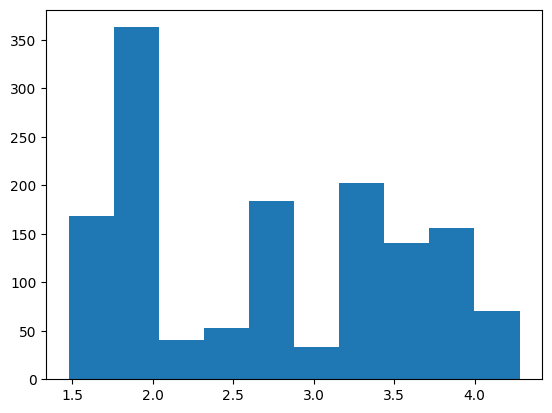

In [8]:
import numpy as np
import matplotlib.pyplot as plt


arr = np.array(df["850_700_mean_wind"])
plt.hist(arr[:3000]);

In [2]:
df.columns

Index(['Unnamed: 0', 'gauge_idx', 'start_datetime_utc', 'end_datetime_utc',
       'gauge_acc_in', 'mrms_q3evap_qpe', 'lat', 'lon', '700mb_UGRD',
       '850mb_DPT', '850mb_TMP', '850mb_HGT', '2m_above_ground_TMP',
       '925mb_DPT', 'entire_atmosphere_single_layer_PWAT', '500mb_TMP',
       '700mb_DPT', '700mb_TMP', '500mb_DPT', '700mb_HGT', '850mb_UGRD',
       '700mb_VGRD', 'highest_tropospheric_freezing_level_HGT', 'surface_PRES',
       'level_of_adiabatic_condensation_from_sfc_HGT', '850mb_VGRD',
       '2m_above_ground_DPT', 'surface_theta_e',
       'lowest_100mb_mean_mixing_ratio', '925mb_700mb_DPT', '850mb_700mb_DPT',
       '850mb_500mb_DPT', 'LCL_LFC_RH', '0-3km_RH', '0-5km_RH', 'DCAPE',
       'low_level_lapse_rate', '3hr_lapse_rate_change', 'sfc_850_pw',
       'sfc_700_pw', '850_700_mean_wind'],
      dtype='object')

In [4]:
df.to_csv("data/2021-01-01_2025-07-25_hrrr_env_v4.csv")

In [ ]:
from metpy.units import units
from metpy.calc import specific_humidity_from_dewpoint, relative_humidity_from_specific_humidity

# LCL-LFC RH
# ---

# https://www.theweatherprediction.com/habyhints3/950/
# * LCL: lifting condensation level
# * LFC: level of free convection
    # "bottom of where CAPE and instability begin"
# * LCL-LFC RH
    # relative humidity between the LCL and LFC levels

# hPa
P_surface  = df["surface_PRES"][0] # * units.hPa
P_850       = 85000.0 # * units.hPa
P_700       = 70000.0 # * units.hPa
P_500       = 50000.0 # * units.hPa

# K
T_surface  = df["2m_above_ground_TMP"][0] # * units.K
T_850      = df["850mb_TMP"][0]           # * units.K
T_700      = df["700mb_TMP"][0]           # * units.K
T_500      = df["500mb_TMP"][0]           # * units.K

# want relative humidity
dp_surface = df["2m_above_ground_DPT"][0] # * units.K
dp_850     = df["850mb_DPT"][0]           # * units.K
dp_700     = df["700mb_DPT"][0]           # * units.K
dp_500     = df["500mb_DPT"][0]           # * units.K

# sh_surface = specific_humidity_from_dewpoint(P_surface, dp_surface)
# sh_850     = specific_humidity_from_dewpoint(P_850, dp_850)
# sh_700     = specific_humidity_from_dewpoint(P_700, dp_700)
# sh_500     = specific_humidity_from_dewpoint(P_500, dp_500)

# rh_surface = relative_humidity_from_specific_humidity(P_surface, T_surface, sh_surface)
# rh_850     = relative_humidity_from_specific_humidity(P_850, T_850, sh_850)
# rh_700     = relative_humidity_from_specific_humidity(P_700, T_700, sh_700)
# rh_500     = relative_humidity_from_specific_humidity(P_500, T_500, sh_500)

In [2]:
# Low Level Lapse Rate
def compute_low_level_lapse_rate(df):
    """
    Low Level Lapse Rate (850-700mb layer) in K/km.
    Positive = temperature decreasing with height (conditionally unstable if > ~6 K/km).
    """
    return (df['850mb_TMP'] - df['700mb_TMP']) / (df['700mb_HGT'] - df['850mb_HGT']) * 1000

df["low_level_lapse_rate"] = compute_low_level_lapse_rate(df)

In [11]:
import numpy as np
import matplotlib.pyplot as plt


WET_ADIABAT = 5.5   # C/km
DRY_ADIABAT = -9.8  # C/km

xp = np.arange(0, 4, 1)
x  = np.arange(0, 4, 1/100)

fp       = np.array([T_500, T_700, T_850, T_surface])
T_interp = np.interp(x, xp, fp)

fp       = np.array([P_500, P_700, P_850, P_surface])
P_interp = np.interp(x, xp, fp)

fp       = np.array([dp_500, dp_700, dp_850, dp_surface])
dp_interp = np.interp(x, xp, fp)

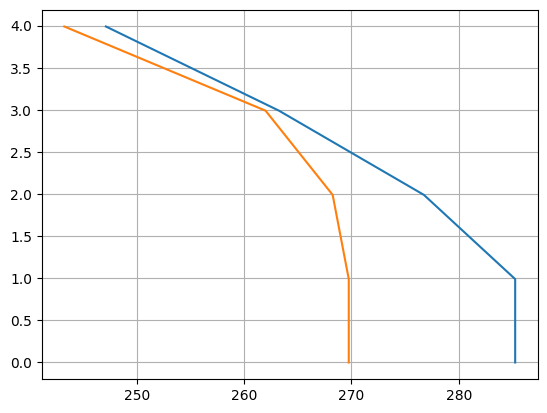

In [15]:
plt.plot(T_interp[::-1], x);
plt.plot(dp_interp[::-1], x);
plt.grid()
plt.show()

In [7]:
# sfc-850 pw

# 850-700 pw

import pandas as pd
import numpy as np

# Physical constant
G = 9.80665  # m/s²

def compute_layer_pw(df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute precipitable water for sfc-850mb and sfc-700mb layers.
    
    Vectorized implementation optimized for pandas DataFrames.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Must contain columns:
        - surface_PRES (Pa)
        - 2m_above_ground_DPT (K)
        - 925mb_DPT (K)
        - 850mb_DPT (K)
        - 700mb_DPT (K)
    
    Returns:
    --------
    DataFrame with new columns 'sfc-850-pw' and 'sfc-700-pw' in mm (kg/m²)
    """
    result = df.copy()
    
    # Pressures (convert surface Pa -> hPa)
    p_sfc = df['surface_PRES'] / 100.0
    p_925, p_850, p_700 = 925.0, 850.0, 700.0
    
    # Dew points (K -> °C for Bolton formula)
    Td_sfc = df['2m_above_ground_DPT'] - 273.15
    Td_925 = df['925mb_DPT'] - 273.15
    Td_850 = df['850mb_DPT'] - 273.15
    Td_700 = df['700mb_DPT'] - 273.15
    
    # Vapor pressure via Bolton (hPa): e = 6.112 * exp(17.67*Td / (Td + 243.5))
    e_sfc = 6.112 * np.exp(17.67 * Td_sfc / (Td_sfc + 243.5))
    e_925 = 6.112 * np.exp(17.67 * Td_925 / (Td_925 + 243.5))
    e_850 = 6.112 * np.exp(17.67 * Td_850 / (Td_850 + 243.5))
    e_700 = 6.112 * np.exp(17.67 * Td_700 / (Td_700 + 243.5))
    
    # Mixing ratio: q = 0.622 * e / (p - e)  [kg/kg]
    q_sfc = 0.622 * e_sfc / (p_sfc - e_sfc)
    q_925 = 0.622 * e_925 / (p_925 - e_925)
    q_850 = 0.622 * e_850 / (p_850 - e_850)
    q_700 = 0.622 * e_700 / (p_700 - e_700)
    
    # Layer PW: (q_mean * dp) / g  where dp in Pa, result in mm
    # Layer contributions (only used where applicable based on surface pressure)
    pw_sfc_925 = (q_sfc + q_925) / 2 * (p_sfc - p_925) * 100 / G
    pw_925_850 = (q_925 + q_850) / 2 * (p_925 - p_850) * 100 / G
    pw_850_700 = (q_850 + q_700) / 2 * (p_850 - p_700) * 100 / G
    pw_sfc_850_direct = (q_sfc + q_850) / 2 * (p_sfc - p_850) * 100 / G
    pw_sfc_700_direct = (q_sfc + q_700) / 2 * (p_sfc - p_700) * 100 / G
    
    # sfc-850 PW (handle surface pressure cases)
    result['sfc_850_pw'] = np.where(
        p_sfc >= 925,
        pw_sfc_925 + pw_925_850,  # Normal case: sfc -> 925 -> 850
        np.where(
            p_sfc >= 850,
            pw_sfc_850_direct,     # High elevation: sfc -> 850 direct
            0.0                    # Very high elevation: above 850mb
        )
    )
    
    # sfc-700 PW
    result['sfc_700_pw'] = np.where(
        p_sfc >= 925,
        pw_sfc_925 + pw_925_850 + pw_850_700,  # Normal case
        np.where(
            p_sfc >= 850,
            pw_sfc_850_direct + pw_850_700,     # High elevation
            np.where(
                p_sfc >= 700,
                pw_sfc_700_direct,              # Very high elevation
                0.0                             # Extreme elevation
            )
        )
    )
    
    return result


df = compute_layer_pw(df)

In [9]:
# 850-700 mean wind

def compute_850_700_mean_wind(df):
    """850-700 mb layer mean wind speed in m/s"""
    wind_850 = np.sqrt(df['850mb_UGRD']**2 + df['850mb_VGRD']**2)
    wind_700 = np.sqrt(df['700mb_UGRD']**2 + df['700mb_VGRD']**2)
    return (wind_850 + wind_700) / 2

df['850_700_mean_wind'] = compute_850_700_mean_wind(df)

In [11]:
df.to_csv("2021-01-01_2025-07-25_hrrr_env_final")

In [5]:
# Convective warm cloud depth

import pandas as pd

def compute_3hr_lapse_rate_change(df: pd.DataFrame) -> pd.Series:
    """
    Compute 3-hour change in low level lapse rate.
    
    Parameters
    ----------
    df : pd.DataFrame
        Must contain 'gauge_idx', 'start_datetime_utc', and 'low_level_lapse_rate'
        
    Returns
    -------
    pd.Series
        3-hour lapse rate change in K/km (or °C/km equivalently)
        NaN for first 3 observations per gauge
    """
    df = df.sort_values(['gauge_idx', 'start_datetime_utc'])
    shifted = df.groupby('gauge_idx')['low_level_lapse_rate'].shift(3)
    return df['low_level_lapse_rate'] - shifted

df["3hr_lapse_rate_change"] = compute_3hr_lapse_rate_change(df)

In [10]:
import numpy as np


all_keys = set(['surface_PRES',
 'level_of_adiabatic_condensation_from_sfc_HGT',
 '925mb_DPT',
 'entire_atmosphere_single_layer_PWAT',
 '2m_above_ground_DPT',
 '2m_above_ground_TMP',
 '700mb_HGT',
 '700mb_UGRD',
 '700mb_DPT',
 '700mb_VGRD',
 '700mb_TMP',
 '500mb_DPT',
 '500mb_TMP',
 'highest_tropospheric_freezing_level_HGT',
 '850mb_HGT',
 '850mb_UGRD',
 '850mb_DPT',
 '850mb_VGRD',
 '850mb_TMP'])
new_cols = {}

for i in range(len(df)):
    item = data[str(i)]
    for k in all_keys:
        if k not in new_cols: new_cols[k] = []
        if k not in item: new_cols[k].append(np.nan)
        else: new_cols[k].append(item[k])

In [11]:
print(all_keys)

{'500mb_TMP', 'surface_PRES', '700mb_HGT', '850mb_DPT', '700mb_DPT', 'level_of_adiabatic_condensation_from_sfc_HGT', '850mb_TMP', '2m_above_ground_TMP', '2m_above_ground_DPT', 'entire_atmosphere_single_layer_PWAT', '500mb_DPT', '700mb_UGRD', '925mb_DPT', '850mb_VGRD', '700mb_TMP', '850mb_HGT', '700mb_VGRD', '850mb_UGRD', 'highest_tropospheric_freezing_level_HGT'}


In [4]:
df = df.assign(**new_cols)

In [ ]:
import zarr
import timeit
from pathlib import Path
from datetime import datetime, timezone
from glob import glob


VARS_OF_INTEREST = [
    {"name": "DPT", "level": "2m_above_ground", "store": "sfc"},
    {"name": "PWAT", "level": "entire_atmosphere_single_layer", "store": "sfc"},
    {"name": "HGT", "level": "level_of_adiabatic_condensation_from_sfc", "store": "sfc"},
    {"name": "HGT", "level": "highest_tropospheric_freezing_level", "store": "sfc"},
    {"name": "APCP", "level": "surface", "store": "sfc"},
    {"name": "DPT", "level": "925mb", "store": "sfc"},
    {"name": "DPT", "level": "850mb", "store": "sfc"},
    {"name": "DPT", "level": "700mb", "store": "sfc"},
    {"name": "DPT", "level": "500mb", "store": "sfc"},
    {"name": "UGRD", "level": "850mb", "store": "sfc"},
    {"name": "VGRD", "level": "850mb", "store": "sfc"},
    {"name": "UGRD", "level": "700mb", "store": "sfc"},
    {"name": "VGRD", "level": "700mb", "store": "sfc"},
    {"name": "TMP", "level": "2m_above_ground", "store": "sfc"},
    {"name": "PRES", "level": "surface", "store": "sfc"},
    {"name": "HGT", "level": "700mb", "store": "sfc"},
    {"name": "HGT", "level": "850mb", "store": "sfc"},
    {"name": "TMP", "level": "700mb", "store": "sfc"},
    {"name": "TMP", "level": "850mb", "store": "sfc"},
    {"name": "TMP", "level": "500mb", "store": "sfc"},
    {"name": "SPFH", "level": "1000mb", "store": "prs"},
    {"name": "SPFH", "level": "925mb",  "store": "prs"},
    {"name": "SPFH", "level": "850mb",  "store": "prs"},
    {"name": "SPFH", "level": "700mb",  "store": "prs"},
    {"name": "RH",   "level": "925mb",  "store": "prs"},
    {"name": "RH",   "level": "850mb",  "store": "prs"},
    {"name": "RH",   "level": "700mb",  "store": "prs"},
]

HRRR_ENV_DIR = "/playpen-ssd/levi/ccrfcd-gauge-grids/data/hrrr-env"

# TZ assumed UTC
dt_fp_dict = {datetime.strptime(Path(fp).name, "%Y%m%d_%Hz_anl") : fp for fp in glob(f"{HRRR_ENV_DIR}/*")}


def get_hrrr_dir_path(dt: datetime) -> str | None:
    # truncate precision < hour
    y, m, d, h = dt.year, dt.month, dt.day, dt.hour
    truc_dt = datetime(year=y, month=m, day=d, hour=h)
    # return fp if in dict
    if truc_dt in dt_fp_dict: return dt_fp_dict[truc_dt]
    else: return None


def get_vertical_levels(hrrr_dir: str) -> list:
    return [Path(fp).name for fp in glob(f"{hrrr_dir}/*")]


def get_env_vars(hrrr_dir: str) -> dict:
    """
    Given a path to a HRRR dir (i.e., valid date/hr),

    Return
    ---
    ```
        [{
            "var_name": ...,
            "level": ...,
            "zgroup": ...,
            "zarr": ...,
        }]
    ```
    """

    evd = []
    env_var_zarrs = glob(f"{hrrr_dir}/*/*/*/*/.zarray")

    for fp in env_var_zarrs:

        p = Path(fp)

        # path to zarr dir for an atmospheric var
        env_var_zarr_fp  = p.parent
        env_var_group_fp = p.parent.parent.parent
        env_var_name     = p.parent.name
        level_name       = p.parent.parent.name

        for var_of_int in VARS_OF_INTEREST:
            lvl = var_of_int['level']
            nme = var_of_int['name']
            if lvl == level_name and nme == env_var_name:
                evd.append({
                    "level": level_name,
                    "var_name": env_var_name,
                    "var_group": zarr.open_group(env_var_group_fp),
                    "var_zarr": zarr.open_array(env_var_zarr_fp),
                })
                break

    return evd


dir_fp = get_hrrr_dir_path(datetime(year=2021, month=1, day=24, hour=0))
env_var_d = get_env_vars(dir_fp)

`get_hrrr_dir_path`: 0.0000s
`get_env_vars`: 0.0004s


In [5]:
za: zarr.Array = env_var_d[0]["var_zarr"]

In [6]:
import s3fs
import xarray as xr


# for projecting zarr -> lat/lon
url = "s3://hrrrzarr/sfc/20210601/20210601_00z_anl.zarr"
fs = s3fs.S3FileSystem(anon=True)
chunk_index = xr.open_zarr(s3fs.S3Map("s3://hrrrzarr/grid/HRRR_chunk_index.zarr", s3=fs))
chunk_index

<xarray.Dataset> Size: 46MB
Dimensions:     (x: 1799, y: 1059)
Coordinates:
  * x           (x) float64 14kB -2.698e+06 -2.695e+06 ... 2.693e+06 2.696e+06
  * y           (y) float64 8kB -1.587e+06 -1.584e+06 ... 1.584e+06 1.587e+06
Data variables:
    chunk_id    (x, y) object 15MB dask.array<chunksize=(1799, 1059), meta=np.ndarray>
    chunk_x     (x) int32 7kB dask.array<chunksize=(1799,), meta=np.ndarray>
    chunk_y     (y) int32 4kB dask.array<chunksize=(1059,), meta=np.ndarray>
    in_chunk_x  (x) int32 7kB dask.array<chunksize=(1799,), meta=np.ndarray>
    in_chunk_y  (y) int32 4kB dask.array<chunksize=(1059,), meta=np.ndarray>
    index_x     (x) int32 7kB dask.array<chunksize=(1799,), meta=np.ndarray>
    index_y     (y) int32 4kB dask.array<chunksize=(1059,), meta=np.ndarray>
    latitude    (y, x) float64 15MB dask.array<chunksize=(133, 450), meta=np.ndarray>
    longitude   (y, x) float64 15MB dask.array<chunksize=(133, 450), meta=np.ndarray>

In [ ]:
import zarr
import xarray as xr
import contextily as cx
import xyzservices.providers as xyz
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt


from src.plot.magic import MRMS_1H_QPE_PALLETE, MRMS_1H_QPE_BOUNDARIES

_LAT_MIN = 34.751857
_LAT_MAX = 37.103662
_LON_MIN = -116.146925 + 360
_LON_MAX = -113.792819 + 360


# pallete from NSSL MRMS web viewer
colors = MRMS_1H_QPE_PALLETE
boundaries = MRMS_1H_QPE_BOUNDARIES

fig = plt.figure(figsize=(10, 10), dpi=300)
gs  = fig.add_gridspec(nrows=1, ncols=1, wspace=0)

ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree()) 
ax1.set_extent([_LON_MIN, _LON_MAX, _LAT_MIN, _LAT_MAX], crs=ccrs.PlateCarree())

# add basemap; tell contextily our axis units are degrees
cx.add_basemap(ax1, crs="EPSG:4326", source=xyz.OpenStreetMap.Mapnik, zoom=10)

# ...
arr = env_var_d[0]['var_zarr'][:].clip(0)

# ax1.contourf(arr);
ct1 = ax1.contourf(chunk_index.longitude, chunk_index.latitude, arr, alpha=0.5)

plt.show()

In [7]:
import numpy as np

from scipy.spatial import cKDTree


def build_latlon_index(chunk_index):
    """
    Build a nearest-neighbor index for the HRRR grid.
    Returns (tree, grid_shape, lons_0_360_flag).
    """
    lats = np.asarray(chunk_index.latitude)
    lons = np.asarray(chunk_index.longitude)

    # Normalize lon handling (your notebook uses 0..360)
    lons_0_360 = (np.nanmin(lons) >= 0) and (np.nanmax(lons) <= 360)

    if lons_0_360:
        lons = np.mod(lons, 360.0)  # keep 0..360
    else:
        # keep -180..180 form; still OK, just be consistent
        pass

    pts = np.column_stack([lats.ravel(), lons.ravel()])

    if cKDTree is None:
        raise ImportError("scipy is required for the fast KDTree approach (pip install scipy).")

    tree = cKDTree(pts)
    return tree, lats.shape, lons_0_360


def value_at_latlon(lat, lon, arr, tree, grid_shape, lons_0_360=True):
    """
    Nearest-neighbor value from arr at (lat, lon).
    Returns (value, (iy, ix), distance_degrees).
    """
    
    # if lon in range: 0-360 -> -180-180
    if lons_0_360:
        lon = lon % 360.0

    dist, flat_idx = tree.query([lat, lon], k=1)
    iy, ix = np.unravel_index(flat_idx, grid_shape)
    return float(arr[iy, ix]), (int(iy), int(ix)), float(dist)

In [8]:
# Build index once
tree, grid_shape, lons_0_360 = build_latlon_index(chunk_index)

# Your data
arr = env_var_d[0]["var_zarr"][:].clip(0)

In [9]:
# Example query (note: if you pass -115, the function will wrap it to 245 if grid is 0..360)
val, (iy, ix), dist = value_at_latlon(36.1, -115.2, arr, tree, grid_shape, lons_0_360=lons_0_360)
val, (iy, ix), dist

(93200.0, (491, 372), 0.004096918317703342)

In [ ]:
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

# for each row, start_datetime
    # hrrr_dir      <-- get hrrr_dir        // find the corresponding HRRR dir for this hour if it exists
    # env_var_zarrs <-- get_zarrs(hrrr_dir) // list of zarrs
    
    # [] // name, val
    # for za in env_var_zarrs
        # lat, lon     <-- row.lat, row.lon
        # val_at_gauge <-- get_value_at(zarr, lat, lon)
        # [].append((za.name, val_at_gauge))


# {datetime: {var: {zarr, location: val@loc}}
zarr_cache = {}
all_rows   = {}


def proc_var(var, dt, lat, lon):

    # unique level, name ID
    comb_name = var["level"] + "_" + var["var_name"]
    
    if comb_name not in zarr_cache[dt]:

        # load zarr into mem; store in cache
        za = var['var_zarr'][:]
        zarr_cache[dt][comb_name] = {
            "zarr": za
        }

    if "val" not in zarr_cache[dt][comb_name]:

        val, (iy, ix), dist = value_at_latlon(lat, lon, za, tree, grid_shape, lons_0_360=lons_0_360)
        zarr_cache[dt][comb_name]["val"] = val

    # load from cache
    val = zarr_cache[dt][comb_name]["val"]

    return (comb_name, val)


def proc_row(i, row):
    
    vals     = row
    dt_str   = " ".join(vals.start_datetime_utc.split(":")[:-3])
    dt       = datetime.strptime(dt_str, "%Y-%m-%d %H")

    # lookup table for caching zarrs
    if dt not in zarr_cache: zarr_cache[dt] = {}
    
    # get path to corresponding hrrr zarr dir
    hrrr_dir = get_hrrr_dir_path(dt)
    lat, lon = vals.lat, vals.lon

    env_vars = get_env_vars(hrrr_dir)
    assert len(env_vars) > 0

    # print("---------------------")
    # print(f"Date: {dt}")

    row_dict = {}

    with ThreadPoolExecutor() as ex:

        procs = [ex.submit(proc_var, var, dt, lat, lon) for var in env_vars]
        for res in as_completed(procs):
            
            result = res.result()
            name, val = result
            row_dict[name] = val

    return i, row_dict


with ThreadPoolExecutor() as ex:

    procs = []
    for i, row in tqdm(enumerate(df.itertuples()), total=len(df)):
        procs.append(ex.submit(proc_row, i, row))

    for proc in tqdm(as_completed(procs), total=len(procs)):
        i, row_dict = proc.result()
        row_dict[i] = row_dict

  0%|          | 0/1557506 [00:00<?, ?it/s]

 36%|███▋      | 566978/1557506 [00:26<00:46, 21245.62it/s]


In [75]:
all_rows

{0: {'surface_PRES': 93460.0,
  'entire_atmosphere_single_layer_PWAT': 9.921875,
  '2m_above_ground_DPT': 269.75,
  '925mb_DPT': 269.75,
  'level_of_adiabatic_condensation_from_sfc_HGT': 1895.0,
  '700mb_VGRD': 5.60546875,
  '700mb_HGT': 2966.0,
  '700mb_UGRD': 3.759765625,
  '700mb_DPT': 262.0,
  '500mb_DPT': 243.25,
  '2m_above_ground_TMP': 285.25,
  '850mb_DPT': 268.25,
  '700mb_TMP': 263.25,
  '500mb_TMP': 247.125,
  'highest_tropospheric_freezing_level_HGT': 1810.0,
  '850mb_TMP': 276.75,
  '850mb_HGT': 1431.0,
  '850mb_UGRD': -0.2275390625,
  '850mb_VGRD': 0.92333984375}}

In [1]:
!pip install datasets

  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached fsspec-2025.10.0-py3-none-any.whl.metadata (10 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
Using cached fsspec-2025.10.0-py3-none-any.whl (200 kB)
Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
Using cached httpcore-1.0.9-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 1.4 MB/s eta 0:00:00a 0:00:01m
Using cached h11-0.16.0-py3-none-any.whl (37 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 2.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: fsspec0m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  3/24 [pyarrow]
    Found existing installation: fsspec 2025.12.0━━━━━━━━━━━━━  3/24 [pyarrow]
    Uninstalling fsspec-2025.12.0:━━━━━━━━━━━━━━━━━━━━━━━━━━━━  3/24 [pyarrow]
      Successfully uninstalled fsspec-2025.12.0━━━━━━━━━━━━━━━  3/24 [pyarrow]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from datasets import load_dataset

# download the dataset; convert to a dataframe
dataset = load_dataset("leharris3/ccrfcd-mrms-hrrr-env-2021-2025")
df = dataset['train'].to_pandas()

/Users/leviharris/anaconda3/envs/automail/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|██████████| 1063947/1063947 [00:03<00:00, 295604.72 examples/s]


In [3]:
df.head()

,gauge_idx,start_datetime_utc,end_datetime_utc,gauge_acc_in,mrms_q3evap_qpe,lat,lon,700mb_UGRD,850mb_DPT,850mb_TMP,...,0-3km_RH,0-5km_RH,low_level_lapse_rate,3hr_lapse_rate_change,sfc_850_pw,sfc_700_pw,850_700_mean_wind,LCL_height,DCAPE,convective_warm_cloud_depth
0,4724.0,2021-01-23 23:12:00+00:00,2021-01-24 00:12:00+00:00,0.0,0.015748,35.939417,-115.077750,2.884766,266.00,277.25,...,20.972270,18.947291,9.120521,0.0,1.355027,5.083167,3.354543,3275.219125,217.040084,0.0
1,4709.0,2021-01-23 23:12:00+00:00,2021-01-24 00:12:00+00:00,0.0,0.007874,35.925000,-115.117000,2.822266,265.75,277.25,...,18.129263,17.823468,9.114583,0.0,1.659570,5.281450,3.429616,3280.064761,249.988458,0.0
2,4564.0,2021-01-23 23:12:00+00:00,2021-01-24 00:12:00+00:00,0.0,0.000000,36.028250,-115.003639,3.759766,268.25,276.75,...,35.305114,21.909930,8.794788,0.0,2.739051,6.916189,3.836471,2990.476711,259.677833,0.0
3,4779.0,2021-01-23 23:12:00+00:00,2021-01-24 00:12:00+00:00,0.0,0.000000,36.021861,-114.958750,3.884766,268.50,276.75,...,30.685404,18.030886,8.794788,0.0,2.890112,7.008753,3.871680,3020.788279,288.870042,0.0
4,4724.0,2021-01-23 23:14:00+00:00,2021-01-24 00:14:00+00:00,0.0,0.015748,35.939417,-115.077750,2.884766,266.00,277.25,...,20.972270,18.947291,9.120521,0.0,1.355027,5.083167,3.354543,3275.219125,217.040084,0.0
